## Práctica 9: Árboles. Parte 2

**Objetivos:** Conocer e identificar las características de los árboles B.

**Actividades:** Implementar algunas operaciones realizadas sobre un árbol B en algún lenguaje de programación.

**Instrucciones:**
- Implementar el árbol B que viene en la presentación del tema de árboles en lenguaje Python

- Analizar la complejidad algorítmica (dar el polinomio) para el peor caso de complejidad cuando se realiza una inserción de números aleatoria de las siguientes funciones:

    – insertNonFull

    – splitChild

    – traverse

    – search 
    
    de la clase BTreeNode
- Generar gráficas delacomplejidad algorítmica de las funciones de la clase BTreeNode analizadas en el punto anterior

In [1]:
import matplotlib.pyplot as plt
import random

C L A S E _ D A T A

In [2]:
class Data:
    def __init__(self, key, value):
        self.key = key
        self.value = value

    def __str__(self):
        return str(self.key) + "->" + self.value

C L A S E _ N O D O

In [3]:
class BTreeNode:
    def __init__(self, t, leaf):
        # t es el grado mínimo del B-Tree, y leaf indica si el nodo es una hoja (True o False).       
        self.t = t  # Grado mínimo del B-Tree.
        self.keys = [None] * (2 * t - 1)  # Lista para almacenar claves en el nodo (máximo 2t - 1 claves).
        self.C = [None] * (2 * t)  # Lista de hijos (máximo 2t hijos).
        self.n = 0  # Número actual de claves en el nodo.
        self.leaf = leaf  # Si es una hoja o no.

    def insertNonFull(self, data, ):
        # Inserta una nueva clave en un nodo que no está lleno.
        global contInsertNonFull
        contInsertNonFull += 1
        i = self.n - 1  # Empieza desde la última clave en el nodo.

        if self.leaf:
            # Si el nodo es una hoja, las claves deben insertarse directamente en el nodo.

            while (i >= 0) and (self.keys[i].key > data.key):
                # Desplaza las claves hacia la derecha para hacer espacio para la nueva clave.
                contInsertNonFull += 1  
                self.keys[i + 1] = self.keys[i]
                i -= 1

            # Inserta la nueva clave en la posición correcta.
            self.keys[i + 1] = data
            self.n += 1  # Incrementa el número de claves en el nodo.
            
        else:
            # Si el nodo no es una hoja, busca el hijo correcto donde insertar la clave.

            while (i >= 0) and (self.keys[i].key > data.key):
                # Encuentra el hijo adecuado para la nueva clave.
                contInsertNonFull += 1  # Incrementa el contador.
                i -= 1

            # Si el hijo ya está lleno, hay que dividirlo.
            if self.C[i + 1].n == 2 * self.t - 1:
                self.splitChild(i + 1, self.C[i + 1])

                # Después de la división, decide cuál de los dos hijos usar para la inserción.
                if self.keys[i + 1].key < data.key:
                    i += 1

            # Inserta recursivamente en el hijo adecuado.
            self.C[i + 1].insertNonFull(data)

    def splitChild(self, i, y):
        # Divide el nodo hijo y crea un nuevo nodo.
        
        global contSplitChild 
        contSplitChild = 0 
        z = BTreeNode(y.t, y.leaf)  # Crea un nuevo nodo z.
        z.n = self.t - 1  # El nuevo nodo tendrá t - 1 claves.

        for j in range(self.t - 1):
            # Copia las últimas t - 1 claves de y a z.
            contSplitChild += 1  # Incrementa el contador.
            z.keys[j] = y.keys[j + self.t]

        if not y.leaf:
            # Si y no es una hoja, también copia los hijos correspondientes a z.
            for j in range(self.t):
                contSplitChild += 1  # Incrementa el contador.
                z.C[j] = y.C[j + self.t]

        y.n = self.t - 1  # Reduce el número de claves en y.

        for j in range(self.n, i, -1):
            # Mueve los punteros a los hijos en el nodo actual para hacer espacio para z.
            contSplitChild += 1  # Incrementa el contador.
            self.C[j + 1] = self.C[j]
        self.C[i + 1] = z  # Conecta el nuevo nodo z al nodo actual.

        for j in range(self.n - 1, i - 1, -1):
            # Mueve las claves en el nodo actual para hacer espacio para la nueva clave.
            contSplitChild += 1  # Incrementa el contador.
            self.keys[j + 1] = self.keys[j]
        self.keys[i] = y.keys[self.t - 1]  # Eleva la clave mediana de y al nodo actual.
        self.n += 1  # Incrementa el número de claves en el nodo actual.

    def traverse(self, l):
        # Realiza un recorrido en el B-Tree e imprime las claves.

        global contTraverse  # Contador para medir las operaciones en 'traverse'.
        for i in range(self.n):
            contTraverse += 1  # Incrementa el contador.
            
            if not self.leaf:
                # Si el nodo no es una hoja, visita el subárbol hijo antes de imprimir la clave.
                self.C[i].traverse(l + 1)
            #print("\t" * l, l, self.keys[i].key, end=' ')
        #print()

        if not self.leaf:
            # Visita el subárbol hijo que sigue después de imprimir las claves.
            self.C[i + 1].traverse(l + 1)

    def search(self, k):
        # Busca una clave en el B-Tree.

        global contSearch  # Contador para medir las operaciones en 'search'.
        contSearch += 1
        i = 0
        while (i < self.n) and (k > self.keys[i].key):
            # Recorre las claves en el nodo hasta encontrar la clave o el lugar donde debería estar.
            contSearch += 1  # Incrementa el contador.
            i += 1

        if (i < self.n) and (k == self.keys[i].key):
            # Si encuentra la clave, la devuelve.
            return self.keys[i]

        if self.leaf:
            # Si llega a una hoja y no encuentra la clave, devuelve None (clave no encontrada).
            return None

        # Si no está en la hoja, busca recursivamente en el hijo adecuado.
        return self.C[i].search(k)



C L A S E _ Á R B O L _ B

In [4]:
class BTree:
    # Esta clase representa el B-Tree en sí, que gestiona los nodos y proporciona operaciones
    # de búsqueda, inserción y recorrido.

    def __init__(self, t):
        # Constructor de la clase BTree.
        # Inicializa un B-Tree con grado mínimo t (número mínimo de claves por nodo).
        self.root = None  # La raíz del árbol comienza como None (árbol vacío).
        self.t = t  # Grado mínimo del B-Tree, se utiliza para determinar el tamaño máximo/mínimo de los nodos.

    def traverse(self):
        # Realiza un recorrido del árbol e imprime las claves.
        if self.root != None:
            # Si el árbol no está vacío, llama al método 'traverse' de la raíz.
            self.root.traverse(0)

    def search(self, k):
        # Busca una clave 'k' en el B-Tree.
        # Si el árbol está vacío (root es None), devuelve None.
        # Si no está vacío, llama al método 'search' del nodo raíz.
        return None if self.root == None else self.root.search(k)

    def insert(self, data):
        # Inserta un nuevo dato (par clave-valor) en el árbol.

        if self.root == None:
            # Si el árbol está vacío, crea un nuevo nodo raíz y lo convierte en una hoja.
            # El nuevo nodo contendrá el dato 'data' que se inserta.
            self.root = BTreeNode(self.t, True)  # Crea un nodo raíz que es una hoja.
            self.root.keys[0] = data  # Inserta el dato en la primera posición del nodo.
            self.root.n = 1  # El nodo ahora tiene una clave.

        else:
            # Si el árbol no está vacío, verifica si la raíz está llena (n == 2 * t - 1).
            if self.root.n == 2 * self.t - 1:
                # Si la raíz está llena, debe dividirse.

                # Crea un nuevo nodo 's' que se convierte en la nueva raíz.
                s = BTreeNode(self.t, False)  # El nuevo nodo no será una hoja.
                s.C[0] = self.root  # La antigua raíz se convierte en el primer hijo de 's'.

                # Divide el nodo raíz, y 's' tendrá dos hijos después de la división.
                s.splitChild(0, self.root)

                # Después de la división, decide cuál de los dos hijos debe recibir la nueva clave.
                i = 0
                if s.keys[0].key < data.key:
                    i += 1  # Si la clave en 'data' es mayor, se inserta en el hijo derecho.

                # Inserta el dato en el hijo adecuado de 's'.
                s.C[i].insertNonFull(data)

                # Actualiza la raíz del árbol a 's'.
                self.root = s

            else:
                # Si la raíz no está llena, inserta el dato directamente en la raíz.
                self.root.insertNonFull(data)


P R U E B A

In [5]:
import random 
import string 
LENGTH_STR = 5
D = 2
values = [10, 27, 29, 17, 25, 21, 15, 31, 13, 51, 20, 24, 48, 19, 60, 35, 66]
contInsertNonFull = 0
contSplitChild = 0
contTraverse = 0
contSearch = 0
    
def randstring(length):
    letters = string.ascii_lowercase
    result_str = "".join(random.choice(letters) for i in range(length)) 
    return result_str

if __name__ == '__main__':
    t = BTree(D)

    for value in values:
        t.insert(Data(value, randstring (LENGTH_STR)))

    t.traverse()
    print()

    k = 10
    prueba = t.search(k)
    
    print(prueba.value)


dpqxh


A N A L I S I S _ C O M P L E J I D A D

<pre style="color: gray;">
def insertNonFull(self, data):
    i = self.n - 1                                                      # 7

    if self.leaf:                                                       # 4
        while (i >= 0) and (self.keys[i].key > data.key):               # 14 ( m + 1 ) m = claves
            self.keys[i + 1] = self.keys[i]                             # 11 m 
            i -= 1                                                      # 5 m

        self.keys[i + 1] = data                                         # 8
        self.n += 1                                                     # 9

    else:
        while (i >= 0) and (self.keys[i].key > data.key):               # 14 ( m + 1 )
            i -= 1                                                      # 5 m

        if (self.C[i + 1].n == 2 * self.t - 1):                         # 17
            self.splitChild(i + 1, self.C[i + 1])                       # 12 m -> Llamada splitChild (t) 

            if (self.keys[i + 1].key < data.key):                       # 12
                i += 1                                                  # 5

        self.C[i + 1].insertNonFull(data)                               # 9 * log(n) -> Se llama recursivamente en altura del árbol
                                                                        # 9log(n) + 61m + 90

=========================================================================================================================================          
def splitChild(self, i, y):                                         
        z = BTreeNode(y.t, y.leaf)                                      # 7                                       
        z.n = self.t-1                                                  # 7                                       
                                    
        for j in range(self.t - 1):                                     # 5 t                                     
            z.keys[j] = y.keys [j + self.t]                             # 10 ( t - 1 )                            
                                      
        if not y.leaf:                                                  # 3                                       
            for j in range(self.t):                                     # 4 ( t + 1 )                             
                z.C[j]= y.C[j+ self.t]                                  # 10 t                                    
        y.n= self.t - 1                                                 # 7                                       
                                        
        for j in range(self.n, i, -1):                                  # 6 ( t + 1 )                             
            self.C[j+1] = self.C[j]                                     # 9 t                                     
        self.C[i + 1] = z                                               # 7                                       
                                       
        for j in range(self.n - 1, i - 1, -1):                          # 10 ( t + 1 )                            
            self.keys [j+1] = self.keys [j]                             # 9 t                                     
        self.keys[i] = y.keys [self.t - 1]                              # 10                                      
        self.n += 1                                                     # 6                                         
                                                                        # 63t + 77 -> t es el grado del árbol b
=========================================================================================================================================       

def traverse(self, l):   
    for i in range(self.n):                                         # 4 n          
        if not self.leaf:                                           # 3 n * t                    
            self.C[i].traverse(l+1)                                 # 7 n * t                                   
    if not self.leaf:                                               # 3      
        self.C[i+1].traverse (l+1)                                  # 7 n * t        
                                                                    # 17(n * t) + 4n + 3
                                                                    n = nodos, t = grado
=========================================================================================================================================


def search (self, k):
    i = 0                                                           # 3  
    while ( i < self.n ) and ( k > self.keys [i].key ):             # 11 ( t + 1 )  
        i += 1                                                      # 5 t    

    if ( i < self.n ) and ( k == self.keys[i].key ):                # 15
        return self.keys[i]          

    if self.leaf:                                                   # 3 
        return None                                                 # 2  

    return self.C[i].search(k)                                      # 5 log(n)   
                                                                    # 5log(n) + 16t + 23
</pre>


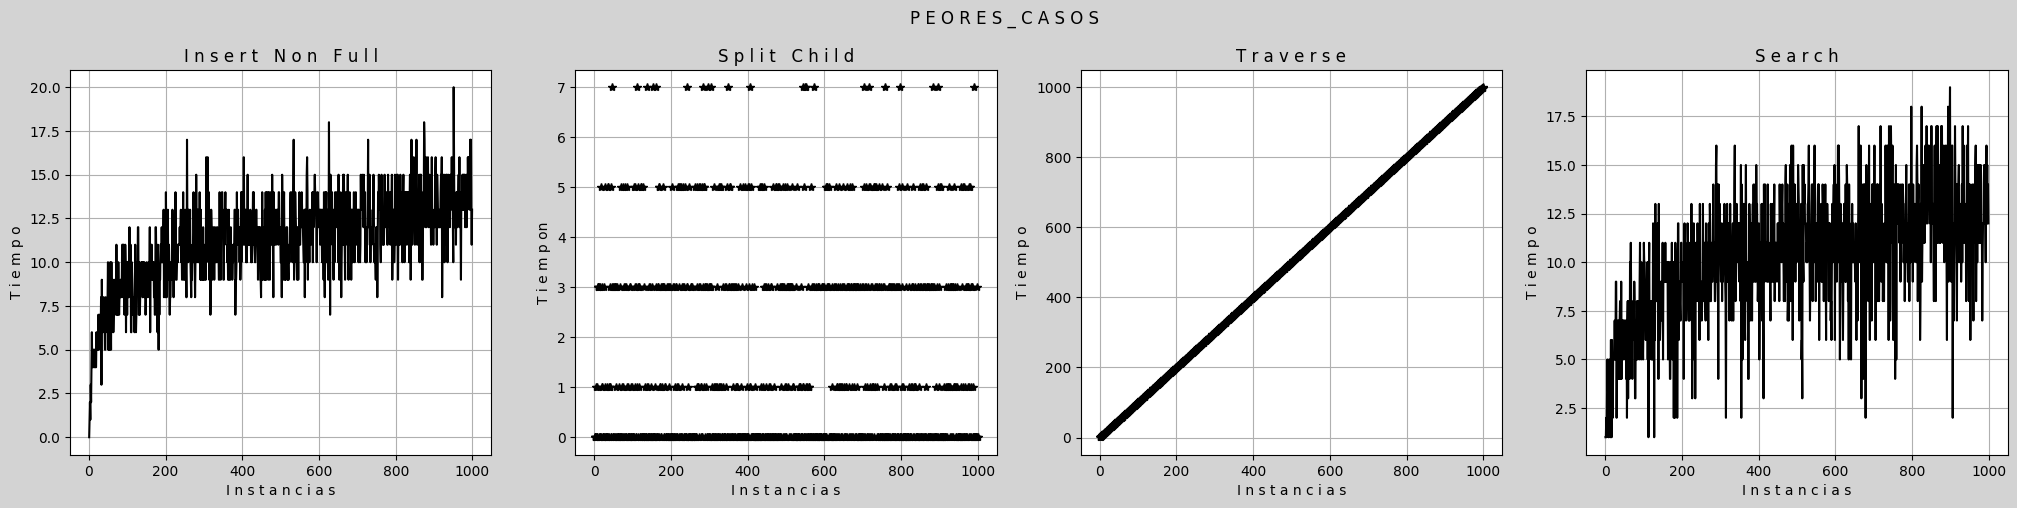

In [6]:
def graph():
    TAM = 1000
    x = [i for i in range(1, TAM)]
    grado = 2
    
    global contInsertNonFull
    global contSplitChild
    global contTraverse
    global contSearch
    
    contInsertNonFull = 0
    contSplitChild = 0
    contTraverse = 0
    contSearch = 0
    
    peorInsert = []
    peorSplit = []
    peorTraverse = []
    peorSearch = []
    
    i = 0
    while i < len(x):
        num = x[i]  
        listaNodos = []
        Arbol = BTree(grado)

        j = 0
        while j < num:
            k = random.randint(-1000, 1000)

            while k in listaNodos:
                k = random.randint(-1000, 1000)

            listaNodos.append(k)
            contInsertNonFull = 0
            contSplitChild = 0
            Arbol.insert(Data(k, ""))
            j += 1 
        i += 1 
        
        contSearch = 0 
        contTraverse = 0
        
        if len(listaNodos) != 0:
            value = random.choice(listaNodos)
            Arbol.search(value)

        
        Arbol.traverse()
        
        peorInsert.append(contInsertNonFull)
        peorSplit.append(contSplitChild)
        peorTraverse.append(contTraverse)
        peorSearch.append(contSearch)

    fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(25, 5))

    ax1 = axs[0]
    ax2 = axs[1]
    ax3 = axs[2]
    ax4 = axs[3]

    ax1.plot(x, peorInsert, "k")
    ax2.plot(x, peorSplit, "k*")
    ax3.plot(x, peorTraverse, "k*")
    ax4.plot(x, peorSearch, "k")

    fig.patch.set_facecolor('lightgray')
    fig.suptitle("P E O R E S _ C A S O S ", y=1)
    ax1.set_title("I n s e r t   N o n   F u l l")
    ax2.set_title("S p l i t   C h i l d")
    ax3.set_title("T r a v e r s e")
    ax4.set_title("S e a r c h")

    ax1.set_xlabel("I n s t a n c i a s")
    ax1.set_ylabel("T i e m p o")

    ax2.set_xlabel("I n s t a n c i a s")
    ax2.set_ylabel("T i e m p on")

    ax3.set_xlabel("I n s t a n c i a s")
    ax3.set_ylabel("T i e m p o")
    
    ax4.set_xlabel("I n s t a n c i a s")
    ax4.set_ylabel("T i e m p o")

    ax1.grid(True)
    ax2.grid(True)
    ax3.grid(True)
    ax4.grid(True)

contInsertNonFull = 0
contSplitChild = 0
contTraverse = 0
contSearch = 0
depth = 0

graph()
